Clusters: [1] [2] :  squared error:  8.0
Clusters: [1] [3] :  squared error:  68.5
Clusters: [1] [4] :  squared error:  200.0
Clusters: [1] [5] :  squared error:  232.0
Clusters: [2] [3] :  squared error:  32.5
Clusters: [2] [4] :  squared error:  128.0
Clusters: [2] [5] :  squared error:  160.0
Clusters: [3] [4] :  squared error:  48.5
Clusters: [3] [5] :  squared error:  48.5
Clusters: [4] [5] :  squared error:  32.0


Iteration 1
Clusters: [[1, 2], [3], [4], [5]]
Total Squared Error: 8.0

Clusters: [1, 2] [3] :  squared error:  72.66666666666667
Clusters: [1, 2] [4] :  squared error:  224.0
Clusters: [1, 2] [5] :  squared error:  266.6666666666667
Clusters: [3] [4] :  squared error:  56.5
Clusters: [3] [5] :  squared error:  56.5
Clusters: [4] [5] :  squared error:  40.0


Iteration 2
Clusters: [[1, 2], [3], [4, 5]]
Total Squared Error: 40.0

Clusters: [1, 2] [3] :  squared error:  104.66666666666667
Clusters: [1, 2] [4, 5] :  squared error:  380.0
Clusters: [3] [4, 5] :  squared er

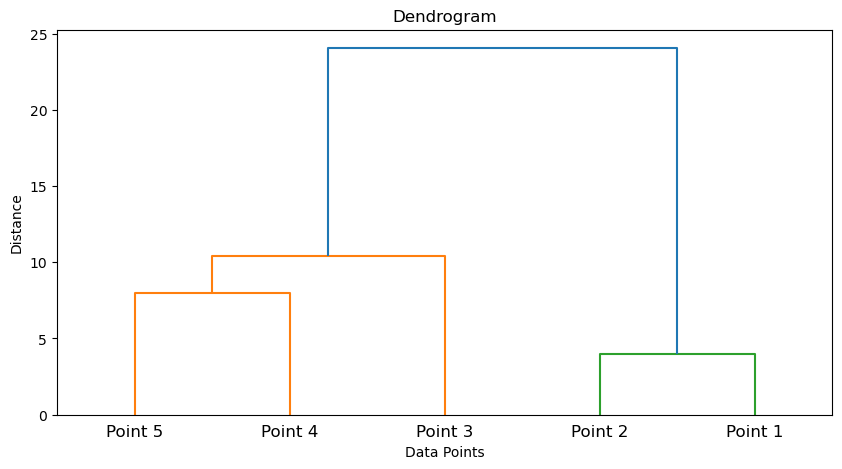

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from scipy.cluster.hierarchy import dendrogram, linkage

def squared_error(cluster_data):
    mean = np.mean(cluster_data, axis=0)
    return np.sum(np.square(cluster_data - mean))

# Data
X = [4, 8, 15, 24, 24]
Y = [4, 4, 8, 4, 12]
data = np.column_stack((X, Y))

# Initialize each data point as a separate cluster
clusters = [[i] for i in range(len(data))]

# Compute initial squared error
total_squared_error = [squared_error(data[cluster]) for cluster in clusters]


# Variables to store cluster variances in each iteration
variances_in_iterations = [total_squared_error]

# Merge clusters until all data points belong to a single cluster
iteration = 1
cumulative_squared_error=0
while len(clusters) > 1:
    # Find the pair of clusters with the smallest increase in squared error
    min_increase = np.inf
    merge_indices = (0, 0)

    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            merged_cluster = np.concatenate((data[clusters[i]], data[clusters[j]]))
           
            increase = squared_error(merged_cluster) - (total_squared_error[i] + total_squared_error[j])
            print("Clusters:", [x + 1 for x in clusters[i]], [x + 1 for x in clusters[j]], ": ", "squared error: ", increase+cumulative_squared_error)
            

            
            if increase < min_increase:
                min_increase = increase
                merge_indices = (i, j)

    # Merge the clusters
    i, j = merge_indices
    clusters[i] += clusters[j]
    del clusters[j]

    # Update the total squared error
    total_squared_error[i] = squared_error(data[clusters[i]])
    
    del total_squared_error[j]

    # Store variances in each iteration
    variances_in_iterations.append(total_squared_error)
    
   

    # Update cumulative squared error
    
    cumulative_squared_error += min_increase
    print("\n")
    # Print iteration information
    print(f"Iteration {iteration}")
    
    print("Clusters:", [[point + 1 for point in cluster] for cluster in clusters])
    print("Total Squared Error:", cumulative_squared_error)
    print()

    iteration += 1



# Print final clustering result
print("\nFinal Clusters:")
for i, cluster in enumerate(clusters):
    print(f"Cluster {i + 1}: {[[point + 1 for point in cluster] for cluster in clusters]}")

# Create a linkage matrix for dendrogram
linked = linkage(data, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linked, orientation='top', labels=[f'Point {i+1}' for i in range(len(data))], distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.axhline(y=40, color='r', linestyle='--')  # Add a horizontal line for dendrogram cutoff
plt.show()
